In [62]:
!pip install tensorflow opencv-python matplotlib

In [5]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
anyio                        3.6.2
appnope                      0.1.3
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        22.2.0
Babel                        2.14.0
backcall                     0.2.0
beautifulsoup4               4.12.0
bleach                       6.0.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.15.1
charset-normalizer           3.3.2
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.6
decorator                    5.1.1
defusedxml                   0.7.1
executing                    1.2.0
fastjsonschema               2.16.

In [6]:
import tensorflow as tf
import os

In [44]:
from PIL import Image
import cv2

In [22]:
data_dir = 'documents/AI/TensorFlow/data/'

In [40]:
img_exts = ['JPG', 'JPEG', 'PNG', 'BMP']

In [83]:
# remove bad pictures
for image_folder in os.listdir(data_dir):
    if image_folder != '.DS_Store':
        for image in os.listdir(os.path.join(data_dir, image_folder)):
            if image != '.DS_Store':
                image_path = os.path.join(data_dir, image_folder, image)
                try:
                    img = Image.open(image_path)
                    if img.format not in img_exts:
                        print(img.format)
                        os.remove(image_path)
                except Exception as e:
                    print("issue with", img.format)

In [45]:
import numpy as np
from matplotlib import pyplot as plt

In [75]:
# get data from dataset and scale to be between 0 - 1
data = tf.keras.utils.image_dataset_from_directory(data_dir).map(lambda x, y: (x/255, y))

Found 195 files belonging to 2 classes.


In [77]:
data_iter = data.as_numpy_iterator()

In [78]:
# get a sample of data from pipeline
# 1 = sad, 0 = happy
batch = data_iter.next()
# images = batch[0]
# labels = batch[1]

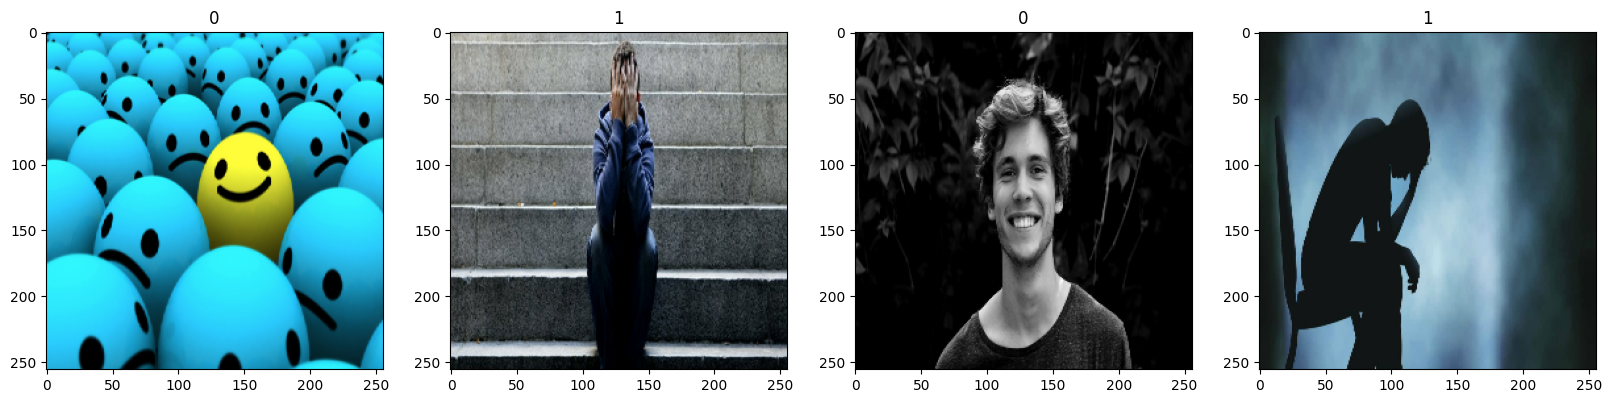

In [82]:
# plot out the images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [92]:
# split data into train, validation, and test sets
train_size = int(len(data) * .7) # train model
valid_size = int(len(data) * .2) + 1 # validation model
test_size = int(len(data) * .1) + 1 # not seen until final stage for evaluation

In [93]:
train = data.take(train_size)
valid = data.skip(train_size).take(valid_size)
test = data.skip(train_size + valid_size).take(test_size)

In [98]:
# deep model
# build Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [113]:
# sequential model used when 1 input and 1 output
model = Sequential()

In [114]:
# first layer is input layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# single output of 0 or 1
model.add(Dense(1, activation='sigmoid'))

In [115]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [118]:
# train data
logdir = 'documents/AI/TensorFlow/logs/'

In [119]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [121]:
# fit our model
# epoch = low long we train for
hist = model.fit(train, epochs=20, validation_data=valid, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 3s 520ms/step - loss: 1.9050 - accuracy: 0.4609 - val_loss: 1.0103 - val_accuracy: 0.3750
Epoch 2/20
4/4 [==============================] - 2s 499ms/step - loss: 0.7992 - accuracy: 0.4375 - val_loss: 0.6284 - val_accuracy: 0.5781
Epoch 3/20
4/4 [==============================] - 2s 497ms/step - loss: 0.6001 - accuracy: 0.6094 - val_loss: 0.5468 - val_accuracy: 0.6250
Epoch 4/20
4/4 [==============================] - 2s 503ms/step - loss: 0.5790 - accuracy: 0.6016 - val_loss: 0.5709 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 2s 505ms/step - loss: 0.5305 - accuracy: 0.7109 - val_loss: 0.4791 - val_accuracy: 0.6562
Epoch 6/20
4/4 [==============================] - 2s 503ms/step - loss: 0.4845 - accuracy: 0.7266 - val_loss: 0.4500 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 2s 504ms/step - loss: 0.4331 - accuracy: 0.8281 - val_loss: 0.4705 - val_accuracy: 0.7812
Epoch 8/20
4/4 [====

In [124]:
hist.history

{'loss': [1.9050192832946777,
  0.7992358207702637,
  0.6000925302505493,
  0.5790465474128723,
  0.5304794311523438,
  0.48453760147094727,
  0.4331258535385132,
  0.4075457751750946,
  0.3488931655883789,
  0.3135406970977783,
  0.30039307475090027,
  0.23482590913772583,
  0.2716989815235138,
  0.188920259475708,
  0.2011902630329132,
  0.1429876983165741,
  0.1009380891919136,
  0.09101538360118866,
  0.06627656519412994,
  0.0641760602593422],
 'accuracy': [0.4609375,
  0.4375,
  0.609375,
  0.6015625,
  0.7109375,
  0.7265625,
  0.828125,
  0.8203125,
  0.8671875,
  0.859375,
  0.890625,
  0.921875,
  0.890625,
  0.9453125,
  0.9296875,
  0.9765625,
  0.984375,
  0.9765625,
  0.9921875,
  0.9765625],
 'val_loss': [1.0103213787078857,
  0.6284376382827759,
  0.5467766523361206,
  0.5708765387535095,
  0.47911536693573,
  0.44998928904533386,
  0.4705469608306885,
  0.3582446575164795,
  0.3304232358932495,
  0.3368540108203888,
  0.22898539900779724,
  0.28558349609375,
  0.242953

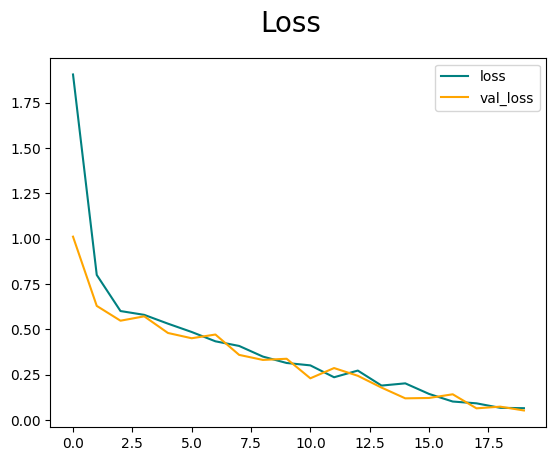

In [126]:
# plot loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

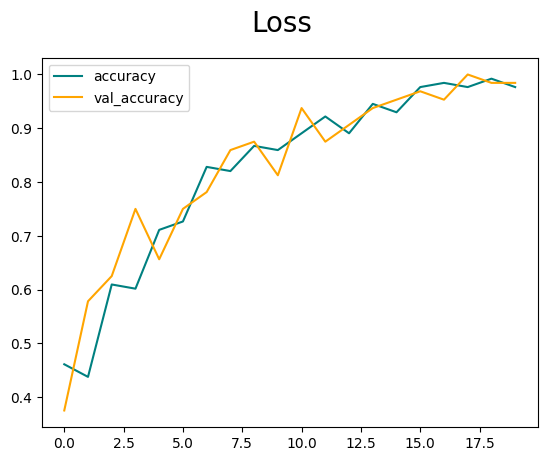

In [127]:
# plot accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [128]:
# Evaluation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [129]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [158]:
# run model on test dataset
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 14ms/step


In [159]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


In [160]:
# run on test dataset
img = cv2.imread('documents/AI/TensorFlow/data/sad.jpeg')

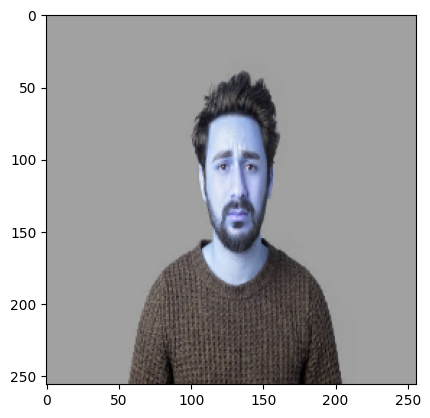

In [161]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [162]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [163]:
yhat

array([[0.641939]], dtype=float32)

In [164]:
if yhat > 0.5:
    print('Image is Sad')
else:
    print('Image is Happy')

Image is Sad


In [165]:
# save the model in future
from tensorflow.keras.models import load_model

In [167]:
model.save(os.path.join('documents/AI/TensorFlow/models', 'happyorsad.keras'))

In [168]:
new_model = load_model(os.path.join('documents/AI/TensorFlow/models', 'happyorsad.keras'))

In [169]:
new_model

In [170]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 58ms/step


array([[0.641939]], dtype=float32)